In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
countries = pd.read_csv("Proyecto/countries.csv")

In [4]:
countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
paises = pd.DataFrame(countries.loc[:, ["continent",
                       "location",
                       "date",
                       'total_cases_per_million', 
                       "total_deaths_per_million"]])

In [6]:
from datetime import date, datetime, timedelta as td
paises["date"]  = pd.to_datetime(paises["date"], format="%d/%m/%Y")

In [7]:
paises.dtypes

continent                           object
location                            object
date                        datetime64[ns]
total_cases_per_million            float64
total_deaths_per_million           float64
dtype: object

In [8]:
# Función para obtener sólo el año en otra columna 
get_year = lambda x: x.year

In [9]:
# Mapping para obtener sólo el año en otra columna 
paises["year"] = paises["date"].map(get_year)

In [10]:
# Vamos a obtener las desviaciones estándar globales de casos COVID-19 por año
std_casos = paises.groupby(["year"])["total_cases_per_million"].std()
std_casos

year
2020     9119.741191
2021    42074.261152
Name: total_cases_per_million, dtype: float64

In [11]:
# Vamos a obtener las desviaciones estándar globales de muertes por COVID-19 por año
std_muertes = paises.groupby(["year"])["total_deaths_per_million"].std()
std_muertes

year
2020    254.832855
2021    822.529654
Name: total_deaths_per_million, dtype: float64

In [12]:
# Vamos a obtener las varianzas globales de casos COVID-19 por año
var_casos = paises.groupby(["year"])["total_cases_per_million"].var()
var_casos

year
2020    8.316968e+07
2021    1.770243e+09
Name: total_cases_per_million, dtype: float64

In [13]:
# Vamos a obtener las varianzas globales de muertes por COVID-19 por año
var_muertes = paises.groupby(["year"])["total_deaths_per_million"].var()
var_muertes

year
2020     64939.783963
2021    676555.032225
Name: total_deaths_per_million, dtype: float64

In [14]:
cuartil1 = lambda x: x.quantile(.25)
cuartil1.__name__ = 'Cuartil_25%'

In [15]:
cuartil2 = lambda x: x.quantile(.50)
cuartil2.__name__ = 'Cuartil_50%'

In [16]:
cuartil3 = lambda x: x.quantile(.75)
cuartil3.__name__ = 'Cuartil_75%'

In [17]:
cuartil4 = lambda x: x.max()
cuartil4.__name__ = 'Cuartil_100%'

In [18]:
func_casos = {
    'total_cases_per_million': [cuartil1, cuartil2, cuartil3, cuartil4]
}

paises.groupby(['year']).agg(func_casos).round(2)

total_cases_per_million                                     
                 Cuartil_25% Cuartil_50% Cuartil_75% Cuartil_100%
year                                                             
2020                   92.62       706.0     4322.24    104054.09
2021                 2248.28     17815.2    60597.56    253504.89

In [ ]:
# Hablemos de desigualdad:
# En 2020, el 25% de los países del mundo (cuarto cuartil) tuvo 1000x más casos por millón que 
# otro 25% de países (primer cuartil). Esto pudo ser por mera geografía.
# Sin embargo, para 2021, el cuarto cuartil tuvo 100x más casos por millón que el primer cuartil. Quizás la diferencia mejoró,
# pero nos puede dar una idea sobre desigualdad la entre condiciones de vida y apoyo sanitario

<AxesSubplot:xlabel='year', ylabel='total_cases_per_million'>

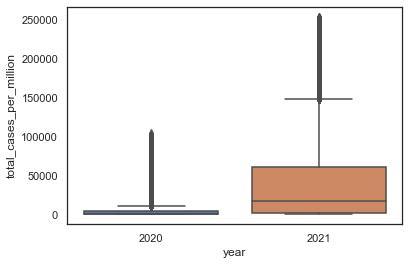

In [41]:
sns.set(style="white")
sns.boxplot(x=paises['year'], y=paises["total_cases_per_million"])

In [21]:
iqr = paises["total_cases_per_million"].quantile(0.75) - paises["total_cases_per_million"].quantile(0.25)
filtro_inferior = paises["total_cases_per_million"] > paises["total_cases_per_million"].quantile(0.25) - (iqr * 1.5)
filtro_superior = paises["total_cases_per_million"] < paises["total_cases_per_million"].quantile(0.75) + (iqr * 1.5)

df_filtrado = paises[filtro_inferior & filtro_superior]

<AxesSubplot:xlabel='year', ylabel='total_cases_per_million'>

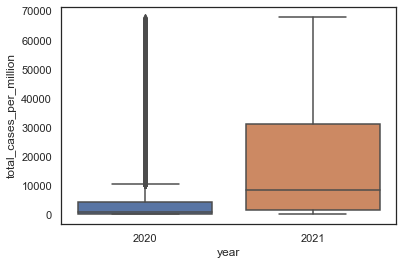

In [38]:
sns.set(style="white")
sns.boxplot(x=df_filtrado['year'], y=df_filtrado["total_cases_per_million"])

In [23]:
func_muertes = {
    'total_deaths_per_million': [cuartil1, cuartil2, cuartil3, cuartil4]
}

paises.groupby(['year']).agg(func_muertes).round(2)

total_deaths_per_million                                     
                  Cuartil_25% Cuartil_50% Cuartil_75% Cuartil_100%
year                                                              
2020                     4.29       22.07      114.94      2789.92
2021                    48.38      294.33     1084.81      6041.08

<AxesSubplot:xlabel='year', ylabel='total_deaths_per_million'>

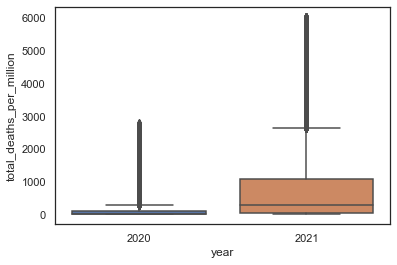

In [39]:
sns.set(style="white")
sns.boxplot(x=paises['year'], y=paises["total_deaths_per_million"])

In [24]:
iqr2 = paises["total_deaths_per_million"].quantile(0.75) - paises["total_deaths_per_million"].quantile(0.25)
filtro_inferior2 = paises["total_deaths_per_million"] > paises["total_deaths_per_million"].quantile(0.25) - (iqr * 1.5)
filtro_superior2 = paises["total_deaths_per_million"] < paises["total_deaths_per_million"].quantile(0.75) + (iqr * 1.5)

df_filtrado2 = paises[filtro_inferior2 & filtro_superior2]

<AxesSubplot:xlabel='year', ylabel='total_deaths_per_million'>

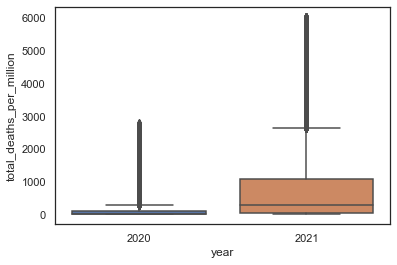

In [40]:
sns.set(style="white")
sns.boxplot(x=df_filtrado2['year'], y=df_filtrado2["total_deaths_per_million"])

In [ ]:
# Hablemos de desigualdad:
# En 2020, el 25% de los países del mundo (cuarto cuartil) tuvo 600x más muertes por millón que 
# otro 25% de países (primer cuartil). Esto pudo ser por mera geografía.
# Sin embargo, para 2021, el cuarto cuartil tuvo 100x más muertes por millón que el primer cuartil. Quizás la diferencia mejoró,
# pero nos puede dar una idea sobre desigualdad la entre condiciones de vida y apoyo sanitario

In [32]:
from scipy.stats import skew, kurtosis

In [33]:
sns.set(style='white')

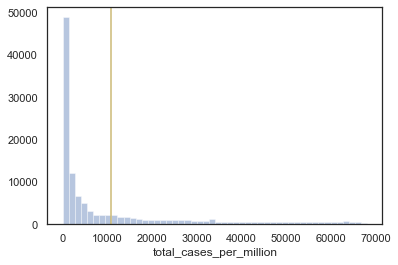

In [34]:
sns.distplot(df_filtrado["total_cases_per_million"], kde=False, norm_hist=False, bins=50)
plt.axvline(df_filtrado["total_cases_per_million"].mean(), c='y')

In [35]:
print(f'Curtosis: {kurtosis(df_filtrado["total_cases_per_million"])}')
print(f'Asimetría: {skew(df_filtrado["total_cases_per_million"])}')

Curtosis: 2.220950510253479
Asimetría: 1.7969544064512282


In [ ]:
# Hallazgo: distribución leptocúrtica (k>0) con asimetría positiva

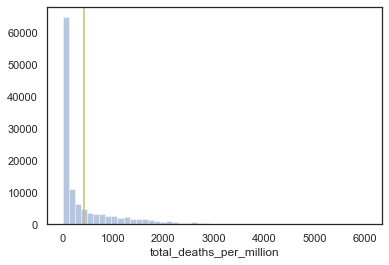

In [36]:
sns.distplot(df_filtrado2["total_deaths_per_million"], kde=False, norm_hist=False, bins=50)
plt.axvline(df_filtrado2["total_deaths_per_million"].mean(), c='y')

In [37]:
print(f'Curtosis: {kurtosis(df_filtrado2["total_deaths_per_million"])}')
print(f'Asimetría: {skew(df_filtrado2["total_deaths_per_million"])}')

Curtosis: 9.648340030208852
Asimetría: 2.5851643080077364
